In [45]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from fitsio import FITS,FITSHDR
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import stats
from astropy.table import Table, Column
from astropy.io import ascii
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
from scipy.stats import kde


(-1, 2)

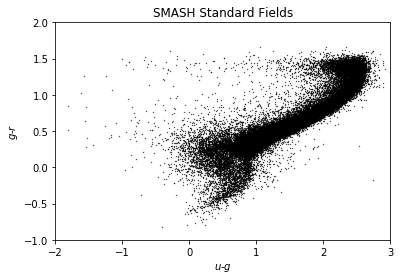

In [46]:
#color-color plot of all stars in SMASH standard star fields
standards = '/Users/amyel/research/SMASH_project/datafiles/smash_standards.fits'
fx = fitsio.FITS(standards)
objs = fx[1].read()
u_std = (objs["U"]-(4.239*objs["EBV"]))
g_std = (objs["G"]-(3.303*objs["EBV"]))
i_std = (objs["I"]-(1.263*objs["EBV"]))
r_std = (objs["R"]-(2.285*objs["EBV"]))
u_g_std = u_std - g_std
g_r_std = g_std - r_std
selected = np.where((u_std<=30)&(r_std<=30)&(g_std<=30))
u_std,g_std,r_std = u_std[selected],g_std[selected],r_std[selected]
plt.scatter((u_std-g_std),(g_std-r_std),s=0.1,c='k')
plt.title('SMASH Standard Fields')
plt.xlabel('$u$-$g$')
plt.ylabel('$g$-$r$')
plt.xlim(-2,3)
plt.ylim(-1,2)

In [ ]:
xx, yy = np.mgrid[u_g_std.min():u_g_std.max():1000j, g_r_std.min():g_r_std.max():1000j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([u_g_std, g_r_std])
kernel = kde.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

In [50]:
xx_std, yy_std = np.mgrid[u_g_std.min():u_g_std.max():1000j, g_r_std.min():g_r_std.max():1000j]
positions = np.vstack([xx_std.ravel(), yy_std.ravel()])
values = np.vstack([u_g_std, g_r_std])
k_std = kde.gaussian_kde(values)




In [51]:
zz_std = np.reshape(k_std(positions).T, xx_std.shape)

(0, 1.5)

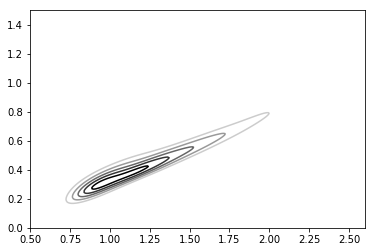

In [65]:
plt.contour(xx_std,yy_std,zz_std,cmap='binary')
plt.xlim(.5,2.6)
plt.ylim(0,1.5)

In [59]:
filename = '/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/starsthree/Field3_allobj_deep_stars.fits.gz'
fx = fitsio.FITS(filename)
objs = fx[1].read()

u = (objs["U"]-(4.239*objs["EBV"]))
g = (objs["G"]-(3.303*objs["EBV"]))
i = (objs["I"]-(1.263*objs["EBV"]))
r = (objs["R"]-(2.285*objs["EBV"]))
selected = np.where((u<=30)&(r<=30)&(g<=30)&(objs['CHI']<3)&(abs(objs['SHARP'])<1)&(objs['PROB']>.8))
u,g,r = u[selected],g[selected],r[selected]
u_g = u-g
g_r = g-r

In [60]:
xy = np.vstack([u_g,g_r])


In [61]:
k = kde.gaussian_kde(xy)

In [62]:
z = k(xy)

(-0.5, 1.6)

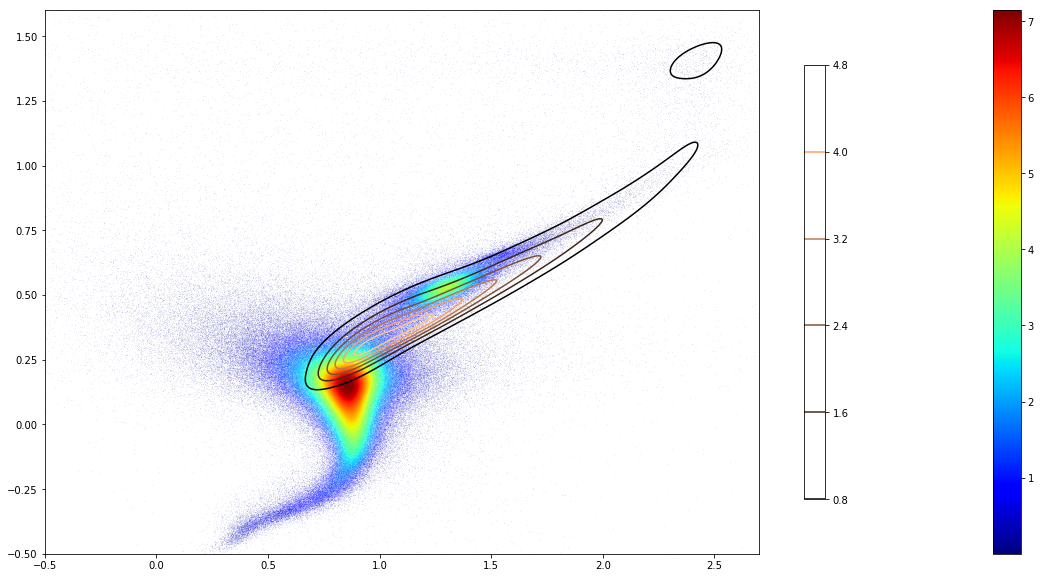

In [117]:
from matplotlib import cm

fig, ax = plt.subplots(figsize=(20, 10))

im1 = ax.scatter(u_g, g_r, c=z, s=0.1, cmap='jet',edgecolor='')
im2 = ax.contour(xx_std,yy_std,zz_std,cmap='copper')

fig.colorbar(im1,ax=ax)
fig.colorbar(im2,ax=ax,shrink=.8,drawedges=False,extendrect=True)

plt.xlim(-.5,2.7)
plt.ylim(-.5,1.6)



(-0.5, 1.6)

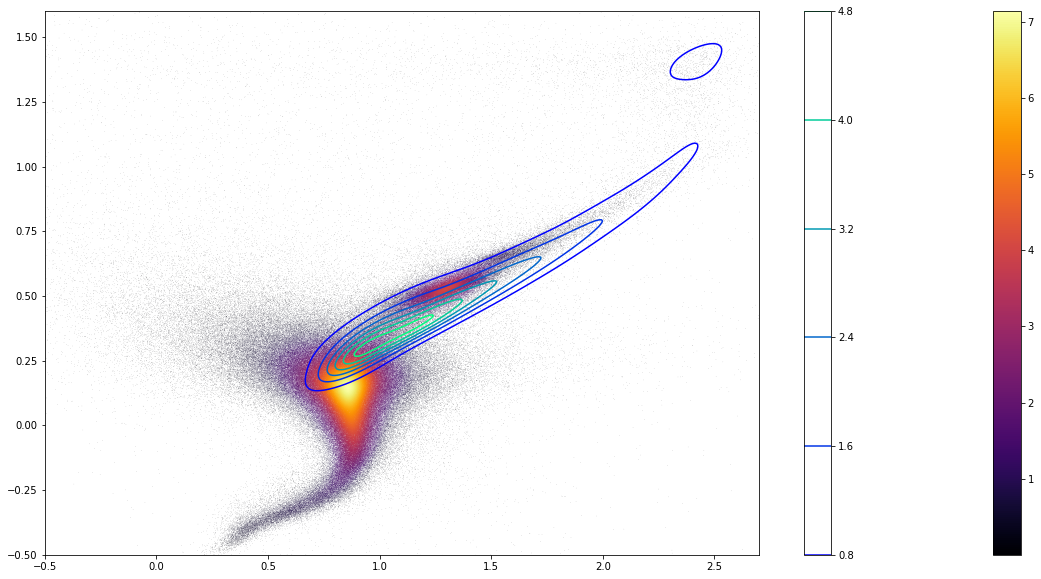

In [116]:
fig, ax = plt.subplots(figsize=(20, 10))
im1=ax.scatter(u_g, g_r, c=z, s=0.1, cmap='inferno',edgecolor='')
im2=ax.contour(xx_std,yy_std,zz_std,cmap='winter')
fig.colorbar(im1,ax=ax)
fig.colorbar(im2,ax=ax)
plt.xlim(-.5,2.7)
plt.ylim(-.5,1.6)
